In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bredasdorp za
mataura pf
tsihombe mg
mehamn no
namatanai pg
kodiak us
souillac mu
tumannyy ru
gueret fr
katsuura jp
likasi cd
alta floresta br
asyut eg
ushuaia ar
ribeira grande pt
atasu kz
mataura pf
kapaa us
yellowknife ca
kapaa us
albany au
utiroa ki
belushya guba ru
chernogorsk ru
tumannyy ru
barrow us
ucluelet ca
busselton au
ust-kulom ru
talnakh ru
hermanus za
butaritari ki
punta cardon ve
kaitangata nz
rikitea pf
mataura pf
saint-joseph re
palmer us
ushibuka jp
rikitea pf
zhezkazgan kz
mataura pf
port elizabeth za
georgetown sh
terrak no
souillac mu
mataura pf
pacific grove us
mataura pf
pacifica us
punta arenas cl
klaksvik fo
severo-kurilsk ru
keti bandar pk
arlit ne
ushuaia ar
saint george bm
clyde river ca
codrington ag
hilo us
praia da vitoria pt
palm coast us
busselton au
mataura pf
ballarat au
korla cn
marapanim br
ribeira grande pt
gladstone au
neryungri ru
kapaa us
atuona pf
palu id
bluff nz
takoradi gh
ushuaia ar
torbay ca
rikitea pf
bosaso so
bargal so
roma au
longyear

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [10]:
import requests
requests.__version__

'2.25.1'

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#url = "http://api.openweathermap.org/data/2.5/weather?units=gat,ly&APPID=" + ""
#print(url)

In [13]:
# Create an endpoint URL for a city.
#city_url = url + "&q=" + "Boston"
#print(city_url)

In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop Through the List of Cities and Build the City URL

# Loop through all the cities in our list.

# Loop through all the cities in our list.

    
    
    
# Note: Unfortunately, this will cause programming errors when we are building the city_url
# because it adds the index, not the city name, to the city_url So use
# Instead of using two for loops, we can use the enumerate() method as an alternative
# way to iterate through the list of cities and retrieve both the index, and the city from the list.

from config import weather_api_key

# Loop through all the cities in the list.


for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + city.replace(" ","+")
    city_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Next, we will retrieve the data from the JSON weather response for each city.
   
# Handle API Request Errors with try-except Blocks

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | mehamn
Processing Record 5 of Set 1 | namatanai
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 1 | gueret
Processing Record 10 of Set 1 | katsuura
Processing Record 11 of Set 1 | likasi
Processing Record 12 of Set 1 | alta floresta
Processing Record 13 of Set 1 | asyut
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | atasu
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | utiroa
City not found. Skipping...
Processing Record 21 of Set 1 | belushya guba
City 

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,45.72,87,100,5.75,ZA,2021-09-15 04:18:18
1,Mataura,-46.1927,168.8643,49.48,59,23,7.40,NZ,2021-09-15 04:18:19
2,Mehamn,71.0357,27.8492,41.18,93,75,3.44,NO,2021-09-15 04:18:19
3,Namatanai,-3.6667,152.4333,75.85,93,100,10.63,PG,2021-09-15 04:18:20
4,Kodiak,57.7900,-152.4072,51.31,58,1,3.44,US,2021-09-15 04:18:20
5,Souillac,-20.5167,57.5167,73.36,100,40,4.61,MU,2021-09-15 04:18:20
6,Gueret,46.1667,1.8667,61.43,98,100,3.53,FR,2021-09-15 04:18:21
7,Katsuura,35.1333,140.3000,80.64,79,100,11.54,JP,2021-09-15 04:18:21
8,Likasi,-10.9814,26.7333,67.23,48,100,2.75,CD,2021-09-15 04:18:22
9,Alta Floresta,-9.8756,-56.0861,73.18,80,10,1.88,BR,2021-09-15 04:18:22


In [24]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date","Humidity", "Lat", "Lng", "Max Temp","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-09-15 04:18:18,87,-34.5322,20.0403,45.72,100,5.75
1,Mataura,NZ,2021-09-15 04:18:19,59,-46.1927,168.8643,49.48,23,7.40
2,Mehamn,NO,2021-09-15 04:18:19,93,71.0357,27.8492,41.18,75,3.44
3,Namatanai,PG,2021-09-15 04:18:20,93,-3.6667,152.4333,75.85,100,10.63
4,Kodiak,US,2021-09-15 04:18:20,58,57.7900,-152.4072,51.31,1,3.44
5,Souillac,MU,2021-09-15 04:18:20,100,-20.5167,57.5167,73.36,40,4.61
6,Gueret,FR,2021-09-15 04:18:21,98,46.1667,1.8667,61.43,100,3.53
7,Katsuura,JP,2021-09-15 04:18:21,79,35.1333,140.3000,80.64,100,11.54
8,Likasi,CD,2021-09-15 04:18:22,48,-10.9814,26.7333,67.23,100,2.75
9,Alta Floresta,BR,2021-09-15 04:18:22,80,-9.8756,-56.0861,73.18,10,1.88


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 - Plot Latitude vs. Temperature

# create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed.

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1631654289.5768018

In [26]:
today = time.strftime("%x")
today

'09/14/21'

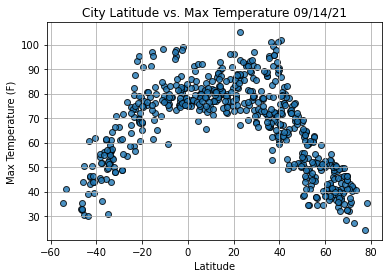

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 - Plot Latitude vs. Humidity

In [29]:
# create a scatter plot that compares the latitude vs. the humidity.
# change the title to "Humidity," and the y-axis label to "Humidity (%)."


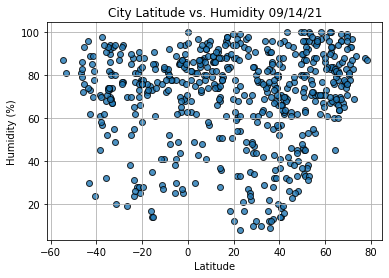

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 - Plot Latitude vs. Cloudiness


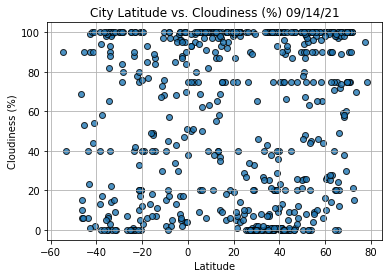

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 - Plot Latitude vs. Wind Speed

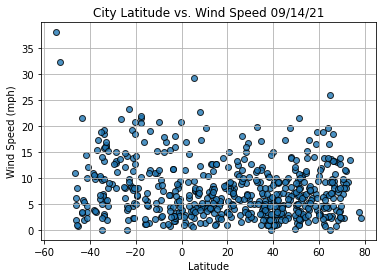

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.1 - Use Linear Regression to Find the Relationship Between Variables

In [33]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
#Create the Hemisphere DataFrames
#add some code to perform regression analysis on the maximum temperatures
#in the Northern and Southern Hemispheres

In [36]:
index13 =city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2021-09-14 19:50:44
Humidity                       62
Lat                        42.097
Lng                      -79.2353
Max Temp                    82.71
Cloudiness                    100
Wind Speed                   8.99
Name: 13, dtype: object

In [38]:
# also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes,
#for latitudes greater than or equal to 0

city_data_df["Lat"]>=0

In [40]:
# If we want to return a DataFrame with all data fitting the criteria,
# for latitudes greater than or equal to 0, we can use the loc method

In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Cloudiness,Wind Speed
0,The Valley,AI,2021-09-14 19:59:40,84,18.2170,-63.0578,85.82,20,13.80
4,Verkhnevilyuysk,RU,2021-09-14 19:59:41,84,63.4453,120.3167,46.11,100,4.63
5,Upernavik,GL,2021-09-14 19:51:44,69,72.7868,-56.1549,27.27,15,9.19
8,Albany,US,2021-09-14 19:46:48,70,42.6001,-73.9662,79.81,89,6.96
10,Luang Prabang,LA,2021-09-14 19:59:42,99,19.8856,102.1347,74.82,98,0.89


In [42]:
# Now assign this DataFrame to the variable northern_hemi_df to access the data
# to perform linear regression

In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

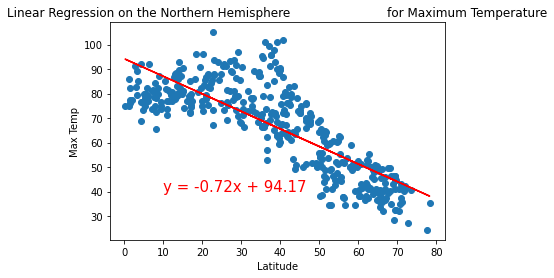

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

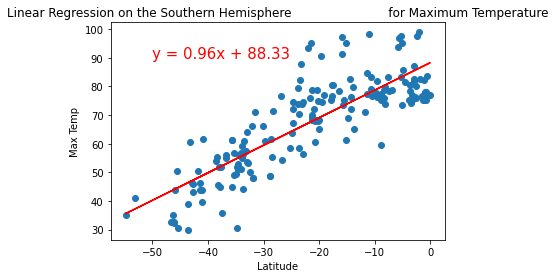

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

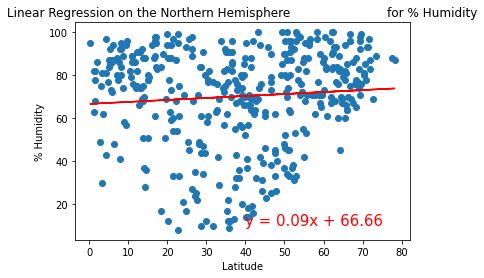

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

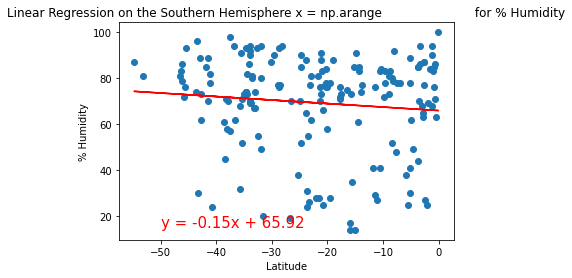

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
x = np.arange                        for % Humidity', '% Humidity',(-50,15))

# 6.4.4 - Find the Correlation Between Latitude and Percent Cloudiness

In [62]:
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

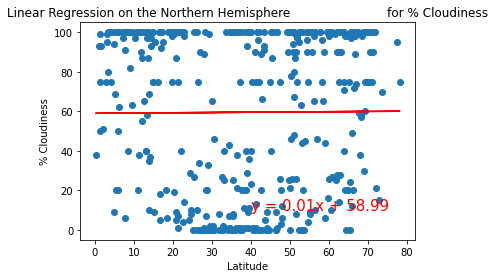

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

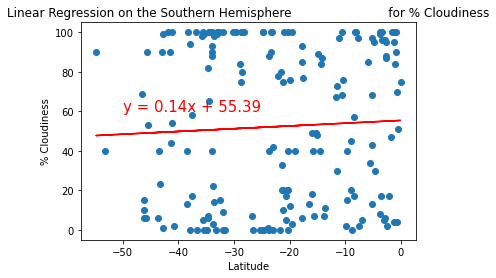

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

# 6.4.5 - Find the Correlation Between Latitude and Wind Speed

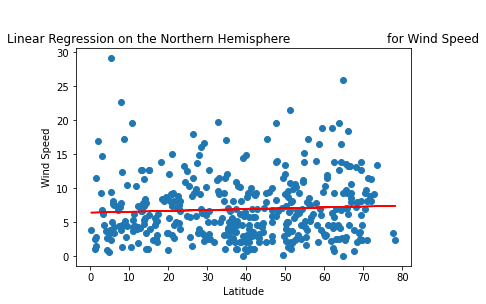

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

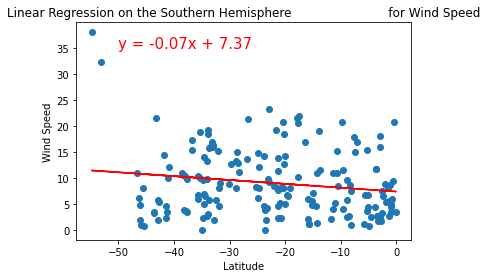

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

# 6.5.1 - Set Up Google Maps and Places API